## Car Listings Analysis & Modeling: Feature Extraction, EDA, and Machine Learning

Data available: https://drive.google.com/file/d/1HhoHtCfkUOnnUcREEqxAG26jt7IobDk8/view?usp=drive_link

## 🔍 Load and Normalize JSON Data

In this step, we load a raw JSON file containing scraped data (including images) and convert it into a structured tabular format using `pandas`.

### 🧾 Steps:
1. **Import libraries**:
   - `json` for parsing the raw `.json` file.
   - `pandas` for converting and handling structured data.

2. **Load JSON file**:
   - The file is located at the specified path and is read using UTF-8 encoding to ensure proper character handling.
   - The content is parsed into a native Python object (likely a list of dictionaries).

3. **Normalize JSON**:
   - We use `pd.json_normalize()` to flatten nested JSON structures.
   - This transforms the raw hierarchical data into a flat DataFrame (`df_raw`) suitable for data exploration and analysis.

This setup is a common first step in data workflows involving web scraping or API responses where the data is stored in semi-structured JSON format.


In [5]:
import json
import pandas as pd
import datetime
import os

# Load the raw JSON file
file_path_json = "/Users/yenokhakobyan/Projects/fastai_practice/data collector/scraped_with_images_first_iteration.json"
with open(file_path_json, 'r', encoding='utf-8') as file:
    raw_data = json.load(file)

# Convert to a DataFrame
df_raw = pd.json_normalize(raw_data)

## 🚗 Feature Extraction from Vehicle Descriptions

In this step, we extract structured features from free-text vehicle descriptions using custom functions and regular expressions. These features will be used to enrich the dataset for further analysis or modeling.

### ✂️ What We Extract:
1. **Mileage (քմ / մղոն)**:
   - Extracts numeric mileage values (between 4 to 6 digits) from the text.
   - Supports both kilometers (`կմ`) and miles (`մղոն`), with miles converted to kilometers using a factor of `1.60934`.

2. **Transmission Type**:
   - Detects either `'Ավտոմատ'` (automatic) or `'Մեխանիկական'` (manual) and standardizes to English values.
   - Defaults to `'unknown'` if not matched.

3. **Fuel Type**:
   - Maps Armenian fuel type terms to English:
     - `'Բենզին'` → petrol  
     - `'Գազ'` → gas  
     - `'Դիզել'` → diesel  
     - `'Էլեկտրական'` → electric  
   - Returns `'unknown'` if none are found.

4. **Body Type**:
   - Searches for Armenian keywords representing body styles and maps them to English equivalents:
     - Example: `'Սեդան'` → `sedan`, `'Մինիվեն'` → `minivan`, etc.
   - Returns `'unknown'` if none match.

5. **Color**:
   - Looks for known Armenian color terms and returns the matched color.
   - Returns `'անհայտ'` (unknown) if no known color is found.

### 🛠️ Implementation:
We define a function for each of the above features and apply them to the `description` column of our dataset using `pandas.Series.apply()`.

### 📌 Result:
New columns are created in the DataFrame:
- `mileage_km`
- `transmission`
- `fuel_type_


In [ ]:
import re

# Function to extract mileage (in km or miles) from description
def extract_mileage(text):
    match = re.search(r'(\d{4,6})\s*(կմ|մղոն)', text)
    if match:
        value = int(match.group(1))
        unit = match.group(2)
        if unit == 'մղոն':  # convert miles to km approximately
            value = int(value * 1.60934)
        return value
    return None

# Function to extract transmission
def extract_transmission(text):
    if 'Ավտոմատ' in text:
        return 'automatic'
    elif 'Մեխանիկական' in text:
        return 'manual'
    return 'unknown'

# Function to extract fuel type
def extract_fuel(text):
    if 'Բենզին' in text:
        return 'petrol'
    elif 'Գազ' in text:
        return 'gas'
    elif 'Դիզել' in text:
        return 'diesel'
    elif 'Էլեկտրական' in text:
        return 'electric'
    return 'unknown'

# Function to extract body type (basic approach)
def extract_body_type(text):
    keywords = {
        'Սեդան': 'sedan',
        'Հետչբեք': 'hatchback',
        'Ամենագնաց': 'suv',
        'Կուպե': 'coupe',
        'Ունիվերսալ': 'universal',
        'Մինիվեն': 'minivan',
        'Միկրոավտոբուս': 'microbus',
        'Պիկապ': 'pickup',
        'Մոտոցիկլ': 'motorcycle',
    }
    for key, val in keywords.items():
        if key in text:
            return val
    return 'unknown'

# Function to extract color
def extract_color(text):
    colors = ['Սև', 'Սպիտակ', 'Կանաչ', 'Մոխրագույն', 'Արծաթագույն', 'Շագանակագույն']
    for c in colors:
        if c in text:
            return c
    return 'անհայտ'

# Apply extraction functions
df_raw['mileage_km'] = df_raw['description'].apply(extract_mileage)
df_raw['transmission'] = df_raw['description'].apply(extract_transmission)
df_raw['fuel_type'] = df_raw['description'].apply(extract_fuel)
df_raw['body_type'] = df_raw['description'].apply(extract_body_type)
df_raw['color'] = df_raw['description'].apply(extract_color)



In [87]:
df_raw.head()

,year,car_type,model,title,listed_date,location,description,phone,additional_info,url,...,customed,price.USD,price.AMD,price.EUR,price.RUB,mileage_km,transmission,fuel_type,body_type,color
0,1953,GAZ,12,1953 GAZ 12 - Auto.am,17.01.2023,"Հայաստան, Արարատ","GAZ 12, 120000կմ, Ունիվերսալ, Ավտոմատ, Ձախ, Բե...",+374 91 419510,None,https://auto.am/offer/1598850,...,True,50000.0,24000000.0,43636.0,3428571.0,120000.0,automatic,petrol,universal,Սև
1,1944,Jeep,Wrangler,1944 Jeep Wrangler - Auto.am,13.04.2022,"Հայաստան, Երևան","Jeep Wrangler, 15000կմ, Ունիվերսալ, Մեխանիկակա...",+374 43 373727,None,https://auto.am/offer/1779460,...,True,35000.0,16828700.0,29830.0,2549803.0,15000.0,manual,petrol,universal,Կանաչ
2,2002,Mercedes-Benz,G 500,2002 Mercedes-Benz G 500 - Auto.am,25.01.2023,"Հայաստան, Երևան","Mercedes-Benz G 500, 335000կմ, Փոխ2013>LEND RO...",+374 43 407700,"Մեքենան անհատական օգտագործման է, գտնվում է շատ...",https://auto.am/offer/1898090,...,True,39000.0,15271230.0,35783.0,3249197.0,335000.0,automatic,petrol,suv,Սև
3,2016,VAZ (Lada),2121 NIVA (4x4),2016 VAZ (Lada) 2121 NIVA (4x4) - Auto.am,18.07.2022,Հայաստան,"VAZ (Lada) 2121 NIVA (4x4), 42600կմ, URBAN, Ամ...",+374 93 424252,"ABS, Բորտ-համակարգիչ, Հայելիների տաքացում, Տաք...",https://auto.am/offer/2211399,...,True,10700.0,5136000.0,9338.0,733714.0,42600.0,manual,gas,suv,Սև
4,2007,Lexus,RX 350,2007 Lexus RX 350 - Auto.am,03.01.2023,"Հայաստան, Երևան","Lexus RX 350, 150000մղոն, Ամենագնաց, Գազ, Ավտո...",+374 95 228004,"ABS, TRC, EBD, ESP, Բորտ-համակարգիչ, Հայելիներ...",https://auto.am/offer/2221985,...,True,15000.0,5952600.0,14560.0,1530231.0,241401.0,automatic,gas,suv,Մոխրագույն


## ⚙️ Additional Feature Extraction from `description` and `additional_info`

We enhance our dataset further by extracting more structured features from the text fields, particularly focusing on the vehicle's mechanical specifications and configuration.

### 🔍 What We Extract:

1. **Drive Side** (`drive_side`):
   - Detects the steering wheel position from the text:
     - `'Ձախ'` → `'left'`
     - `'Աջ'` → `'right'`
   - Returns `'unknown'` if neither is found.

2. **Engine Volume** (`engine_volume`):
   - Searches for engine capacity in liters using a regex pattern (e.g., `1.6`, `2.0`).
   - Extracted as a float from the `description`.

3. **Feature Count** (`feature_count`):
   - Counts the number of comma-separated entries in the `additional_info` column.
   - Assumes each item represents a distinct feature.
   - Safely handles missing or non-string values by returning `0`.

### 🛠️ Implementation:
Each feature is extracted using a custom function and applied to the corresponding text field (`description` or `additional_info`) via `pandas.Series.apply()`.

### 📌 Result:
New columns created:
- `drive_side`
- `engine_volume`
- `feature_count`

These features provide additional insights into vehicle configuration and richness of listings, supporting more advanced analysis or predictive modeling down the line.


In [88]:
# Additional feature extraction from description and additional_info

# Extract drive side (left/right)
def extract_drive_side(text):
    if 'Ձախ' in text:
        return 'left'
    elif 'Աջ' in text:
        return 'right'
    return 'unknown'

# Extract engine volume (in liters, from description or additional_info)
def extract_engine_volume(text):
    match = re.search(r'(\d\.\d)\s*', text)
    if match:
        return float(match.group(1))
    return None

# Count number of features mentioned in additional_info
def count_additional_features(text):
    if isinstance(text, str):
        return len([feature for feature in text.split(',') if feature.strip()])
    return 0

# Apply additional extraction
df_raw['drive_side'] = df_raw['description'].apply(extract_drive_side)
df_raw['engine_volume'] = df_raw['description'].apply(extract_engine_volume)
df_raw['feature_count'] = df_raw['additional_info'].apply(count_additional_features)



## 🧰 Binary Feature Engineering from `additional_info`

In this step, we extract key vehicle options and amenities from the `additional_info` text field. These are transformed into **binary features** (0/1) indicating the presence or absence of each item.

### 🔑 Key Features Tracked:
We define a list of important vehicle features commonly found in listings, such as:
- **Safety & Control**: `ABS`, `ESP`, `EBD`, `TRC`
- **Comfort**: `Տաքացվող նստատեղեր` (heated seats), `Կոնդիցիոներ` (air conditioner), `Կլիմատ-կոնտրոլ` (climate control)
- **Convenience**: `Բորտ-համակարգիչ` (onboard computer), `Կրուիզ-կոնտրոլ` (cruise control), `Նավիգացիոն համակարգ` (navigation system)
- **Technology**: `Ետևի տեսադաշտի տեսախցիկ` (rearview camera), `Լույսի սենսոր` (light sensor), `Անձրևի սենսոր` (rain sensor)

### 🧠 Logic:
1. **Function `extract_main_features()`**:
   - Checks if each predefined feature is present in the `additional_info` string.
   - Returns a dictionary mapping each feature to `1` (present) or `0` (absent).

2. **Application**:
   - The function is applied row-wise to `additional_info`.
   - Each dictionary is expanded into its own column using `apply(pd.Series)`.

3. **Final Merge**:
   - The resulting DataFrame of binary features is concatenated back to the main `df_raw`.

### 📌 Result:
The dataset is now enriched with a set of **binary indicator columns**, each representing a specific car feature. This transformation makes the data more suitable for machine learning or detailed statistical analysis.


In [89]:
# Define key features to extract from additional_info
main_features = ['ABS', 'ESP', 'EBD', 'TRC', 'Բորտ-համակարգիչ', 'Տաքացվող նստատեղեր',
                 'Էլեկտրակառավարվող հայելիներ', 'Կրուիզ-կոնտրոլ', 'Լյուկ', 'Կոնդիցիոներ',
                 'Կլիմատ-կոնտրոլ', 'Ետևի տեսադաշտի տեսախցիկ', 'Նավիգացիոն համակարգ',
                 'Հակաառևանգման համակարգ', 'Լույսի սենսոր', 'Անձրևի սենսոր']

# Function to check presence of each feature
def extract_main_features(text):
    if not isinstance(text, str):
        text = ''
    return {feature: int(feature in text) for feature in main_features}

# Apply feature extraction
main_feature_df = df_raw['additional_info'].apply(extract_main_features).apply(pd.Series)

# Concatenate with original DataFrame
df_raw = pd.concat([df_raw, main_feature_df], axis=1)

In [1]:
df_raw.head()

NameError: name 'df_raw' is not defined

In [91]:
# Re-import necessary libraries after code execution environment reset
import pandas as pd
import json


# Extract the first image from the 'images' list
def get_first_image(image_list):
    if isinstance(image_list, list) and image_list:
        return image_list[0]
    return None

# Apply to dataframe
df_raw['first_image'] = df_raw['images'].apply(get_first_image)


In [92]:
df_raw.head()

,year,car_type,model,title,listed_date,location,description,phone,additional_info,url,...,Կրուիզ-կոնտրոլ,Լյուկ,Կոնդիցիոներ,Կլիմատ-կոնտրոլ,Ետևի տեսադաշտի տեսախցիկ,Նավիգացիոն համակարգ,Հակաառևանգման համակարգ,Լույսի սենսոր,Անձրևի սենսոր,first_image
0,1953,GAZ,12,1953 GAZ 12 - Auto.am,17.01.2023,"Հայաստան, Արարատ","GAZ 12, 120000կմ, Ունիվերսալ, Ավտոմատ, Ձախ, Բե...",+374 91 419510,None,https://auto.am/offer/1598850,...,0,0,0,0,0,0,0,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...
1,1944,Jeep,Wrangler,1944 Jeep Wrangler - Auto.am,13.04.2022,"Հայաստան, Երևան","Jeep Wrangler, 15000կմ, Ունիվերսալ, Մեխանիկակա...",+374 43 373727,None,https://auto.am/offer/1779460,...,0,0,0,0,0,0,0,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...
2,2002,Mercedes-Benz,G 500,2002 Mercedes-Benz G 500 - Auto.am,25.01.2023,"Հայաստան, Երևան","Mercedes-Benz G 500, 335000կմ, Փոխ2013>LEND RO...",+374 43 407700,"Մեքենան անհատական օգտագործման է, գտնվում է շատ...",https://auto.am/offer/1898090,...,0,0,0,0,0,0,0,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...
3,2016,VAZ (Lada),2121 NIVA (4x4),2016 VAZ (Lada) 2121 NIVA (4x4) - Auto.am,18.07.2022,Հայաստան,"VAZ (Lada) 2121 NIVA (4x4), 42600կմ, URBAN, Ամ...",+374 93 424252,"ABS, Բորտ-համակարգիչ, Հայելիների տաքացում, Տաք...",https://auto.am/offer/2211399,...,0,0,1,1,1,1,1,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...
4,2007,Lexus,RX 350,2007 Lexus RX 350 - Auto.am,03.01.2023,"Հայաստան, Երևան","Lexus RX 350, 150000մղոն, Ամենագնաց, Գազ, Ավտո...",+374 95 228004,"ABS, TRC, EBD, ESP, Բորտ-համակարգիչ, Հայելիներ...",https://auto.am/offer/2221985,...,1,0,0,0,0,0,0,1,1,/Users/yenokhakobyan/Projects/fastai_practice/...


In [93]:
from itables import show
import pandas as pd

# Convert image paths to HTML <img> tags
df_raw['image_preview'] = df_raw['first_image'].apply(
    lambda x: f'<img src="{x}" width="120">' if pd.notna(x) else ''
)

# Select features
columns = ['year', 'car_type', 'model', 'title', 'listed_date', 'location',
        'customed',
       'price.USD', 'price.AMD', 'mileage_km',
       'transmission', 'fuel_type', 'body_type', 'color', 'drive_side',
       'engine_volume', 'feature_count', 'ABS', 'ESP', 'EBD', 'TRC',
       'Բորտ-համակարգիչ', 'Տաքացվող նստատեղեր', 'Էլեկտրակառավարվող հայելիներ',
       'Կրուիզ-կոնտրոլ', 'Լյուկ', 'Կոնդիցիոներ', 'Կլիմատ-կոնտրոլ',
       'Ետևի տեսադաշտի տեսախցիկ', 'Նավիգացիոն համակարգ',
       'Հակաառևանգման համակարգ', 'Լույսի սենսոր', 'Անձրևի սենսոր',
       'first_image','image_preview']

# Display with interactive filter
show(df_raw[columns], escape=False)


In [94]:
df_raw[columns].to_csv('car_data.csv', index=False, encoding='utf-8-sig')

## 📊 Exploratory Data Analysis (EDA)

In this section, we perform exploratory analysis on the cleaned and enriched dataset to understand its structure, key distributions, and relationships between features.

---

### 1️⃣ Load Dataset
We load the dataset from a CSV file (`car_data.csv`) and import necessary libraries:
- `pandas` for data handling
- `matplotlib` and `seaborn` for visualization

---

### 2️⃣ Dataset Overview
- **Shape**: Shows the number of rows and columns.
- **Missing Values**: Counts null values per column to assess data completeness.

---

### 3️⃣ Basic Statistical Summary
- Uses `df.describe()` to summarize numerical columns with metrics like:
  - Mean
  - Standard deviation
  - Min/max
  - Quartiles

---

### 4️⃣ Year Distribution
- Histogram showing the distribution of vehicle manufacturing years.
- Helps identify common model years and outliers.


In [3]:
# 1. Load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("car_data.csv")

# 2. Overview
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# 3. Basic stats
print("\nNumerical summary:")
df.describe()


Shape: (941, 35)

Missing values:
 year                            18
car_type                        18
model                           18
title                           18
listed_date                     18
location                        33
customed                        18
price.USD                       18
price.AMD                       18
mileage_km                      60
transmission                     0
fuel_type                        0
body_type                        0
color                            0
drive_side                       0
engine_volume                  694
feature_count                    0
ABS                              0
ESP                              0
EBD                              0
TRC                              0
Բորտ-համակարգիչ                  0
Տաքացվող նստատեղեր               0
Էլեկտրակառավարվող հայելիներ      0
Կրուիզ-կոնտրոլ                   0
Լյուկ                            0
Կոնդիցիոներ                      0
Կլիմատ-կոնտրոլ      

,year,price.USD,price.AMD,mileage_km,engine_volume,feature_count,ABS,ESP,EBD,TRC,...,Էլեկտրակառավարվող հայելիներ,Կրուիզ-կոնտրոլ,Լյուկ,Կոնդիցիոներ,Կլիմատ-կոնտրոլ,Ետևի տեսադաշտի տեսախցիկ,Նավիգացիոն համակարգ,Հակաառևանգման համակարգ,Լույսի սենսոր,Անձրևի սենսոր
count,923.000000,923.000000,9.230000e+02,8.810000e+02,247.000000,941.000000,941.000000,941.000000,941.000000,941.000000,...,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,2011.619718,19681.959913,7.978372e+06,1.485434e+05,2.989069,11.299681,0.569607,0.469713,0.330499,0.352816,...,0.528162,0.505845,0.147715,0.261424,0.235919,0.201913,0.132837,0.194474,0.458023,0.410202
std,6.783411,9481.308350,3.872960e+06,8.588123e+04,1.059607,11.726107,0.495394,0.499347,0.470643,0.478100,...,0.499472,0.500232,0.355006,0.439644,0.424798,0.401641,0.339579,0.396006,0.498500,0.492132
min,1944.000000,5500.000000,2.136365e+06,1.000000e+03,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,12500.000000,5.115002e+06,9.100000e+04,2.400000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,16000.000000,6.500000e+06,1.500000e+05,2.500000,8.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,24700.000000,9.787920e+06,1.980000e+05,3.500000,17.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2023.000000,50000.000000,2.400000e+07,1.384032e+06,6.300000,45.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

# 4. Year distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['year'].dropna(), bins=30, kde=True)
plt.title("Distribution of Car Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 5. Price distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['price.USD'].dropna(), bins=40, kde=True)
plt.title("Price Distribution (USD)")
plt.xlabel("Price in USD")
plt.show()

# 6. Top 10 car types
top_car_types = df['car_type'].value_counts().head(10)
top_car_types.plot(kind='barh', title="Top 10 Car Brands")
plt.xlabel("Number of Listings")
plt.show()

# 7. Transmission vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='price.USD', data=df)
plt.title("Transmission Type vs Price")
plt.xticks(rotation=45)
plt.show()

# 8. Fuel type distribution
sns.countplot(data=df, x='fuel_type', order=df['fuel_type'].value_counts().index)
plt.title("Fuel Type Frequency")
plt.xticks(rotation=45)
plt.show()

# 9. Correlation heatmap (numerical features)
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


/var/folders/4r/6fydpnls2mg8q1p98g9zqmy00000gn/T/ipykernel_73870/274453358.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=car_brand_counts.index, x=car_brand_counts.values, palette='viridis')


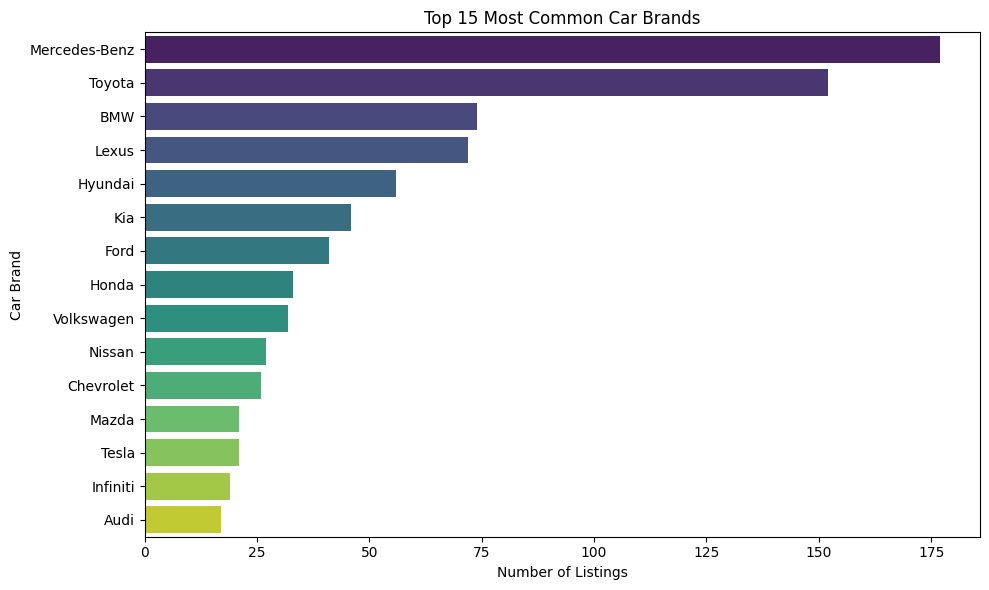

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the most common car brands (car_type)
car_brand_counts = df['car_type'].value_counts().head(15)

# Plot the top 15 car brands
plt.figure(figsize=(10, 6))
sns.barplot(y=car_brand_counts.index, x=car_brand_counts.values, palette='viridis')
plt.title("Top 15 Most Common Car Brands")
plt.xlabel("Number of Listings")
plt.ylabel("Car Brand")
plt.tight_layout()
plt.show()


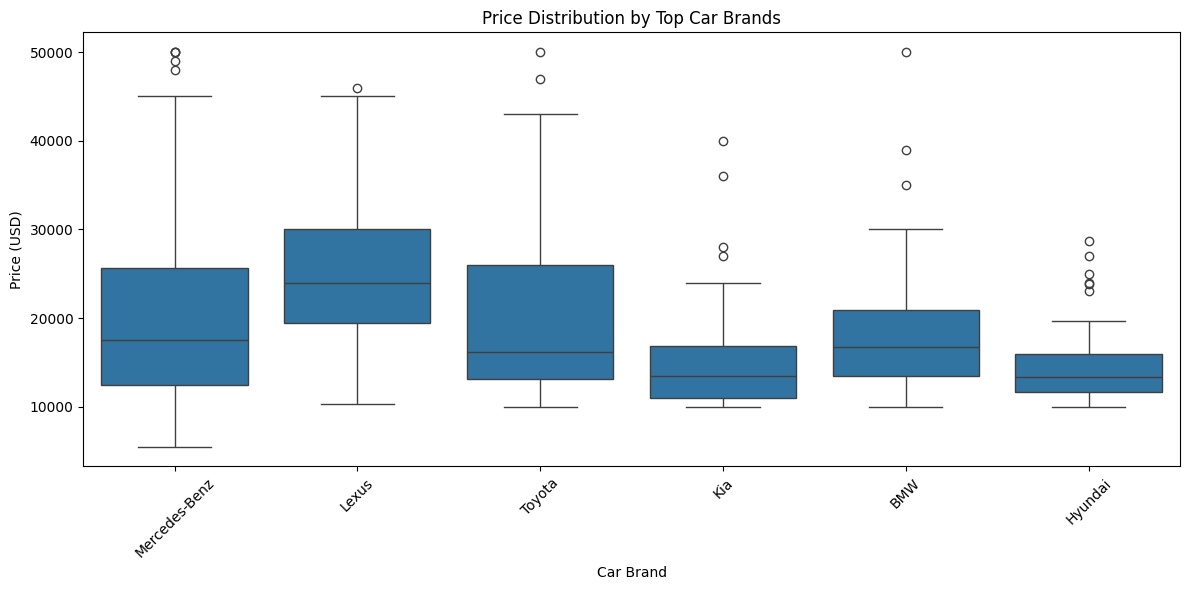

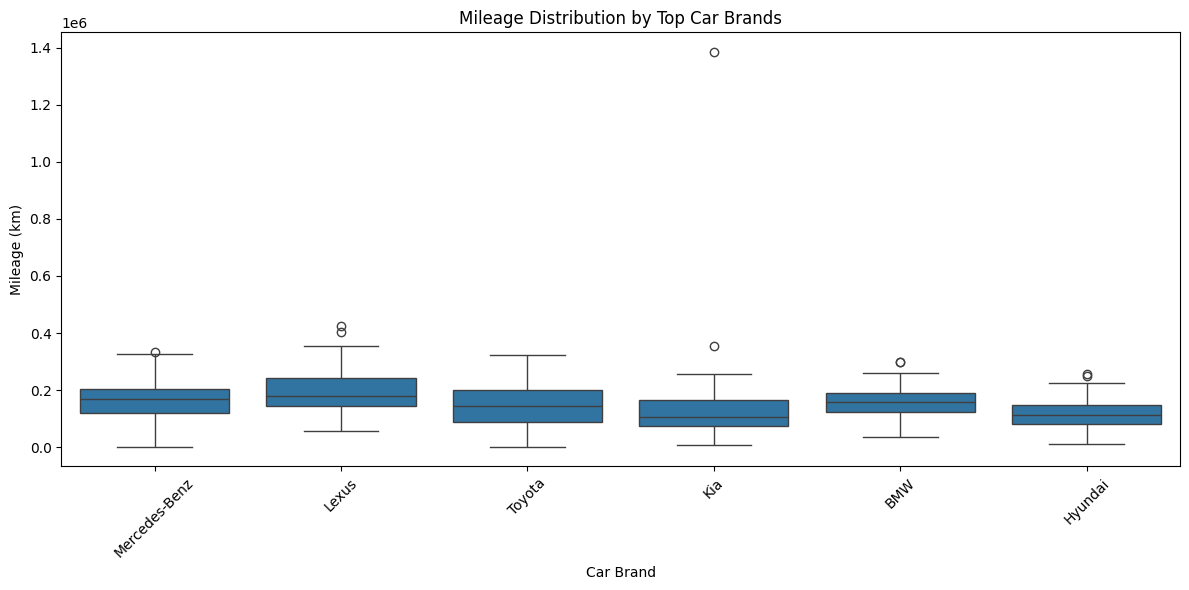

In [97]:
# Filter data to include only top 6 car brands for clearer plots
top_brands = df['car_type'].value_counts().head(6).index
df_top_brands = df[df['car_type'].isin(top_brands)]

# Set up the figure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_brands, x='car_type', y='price.USD')
plt.title("Price Distribution by Top Car Brands")
plt.ylabel("Price (USD)")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mileage comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_brands, x='car_type', y='mileage_km')
plt.title("Mileage Distribution by Top Car Brands")
plt.ylabel("Mileage (km)")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


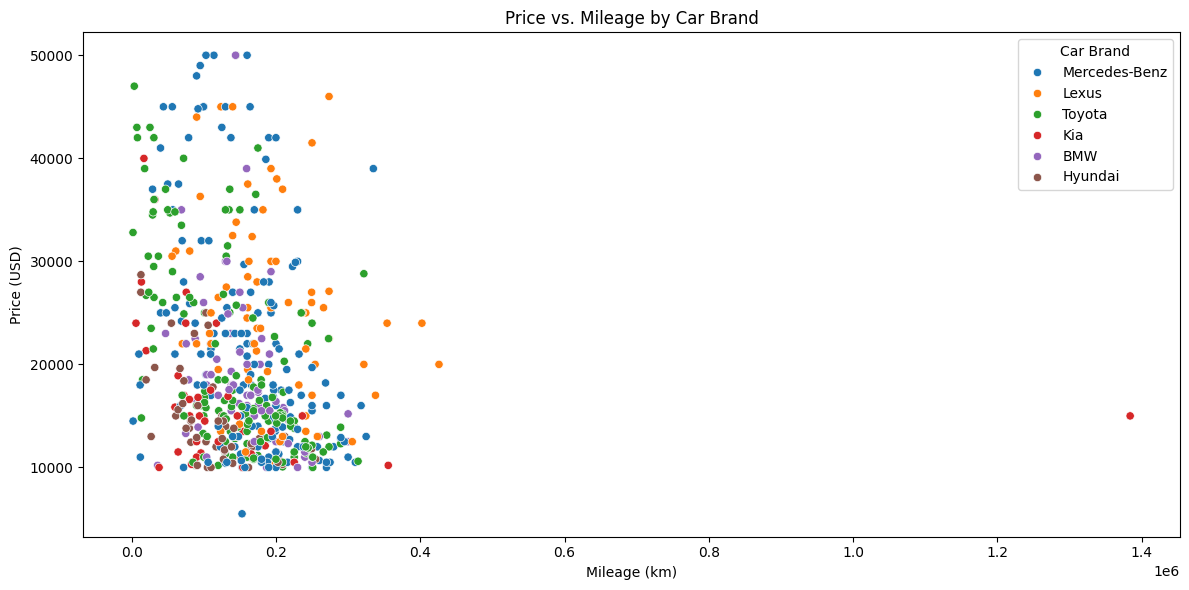

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_brands, x='mileage_km', y='price.USD', hue='car_type')
plt.title("Price vs. Mileage by Car Brand")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (USD)")
plt.legend(title='Car Brand')
plt.tight_layout()
plt.show()


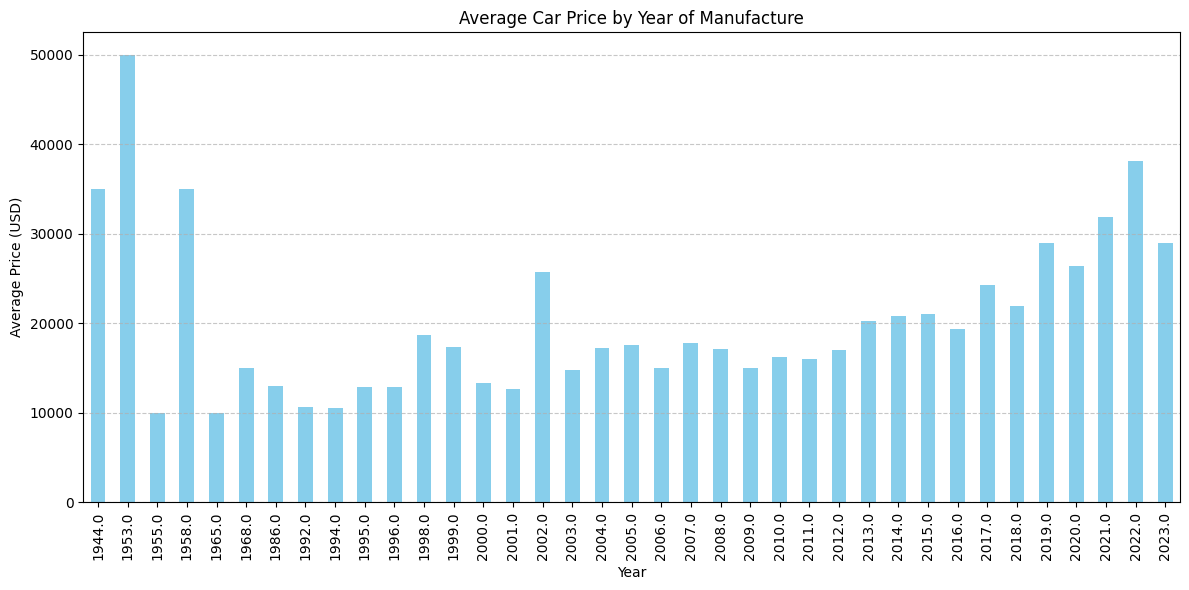

In [99]:
import matplotlib.pyplot as plt

# Calculate average price by year
avg_price_by_year = df.groupby('year')['price.USD'].mean().dropna()

# Plot the average price by year as a bar chart
plt.figure(figsize=(12, 6))
avg_price_by_year.plot(kind='bar', color='skyblue')
plt.title("Average Car Price by Year of Manufacture")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


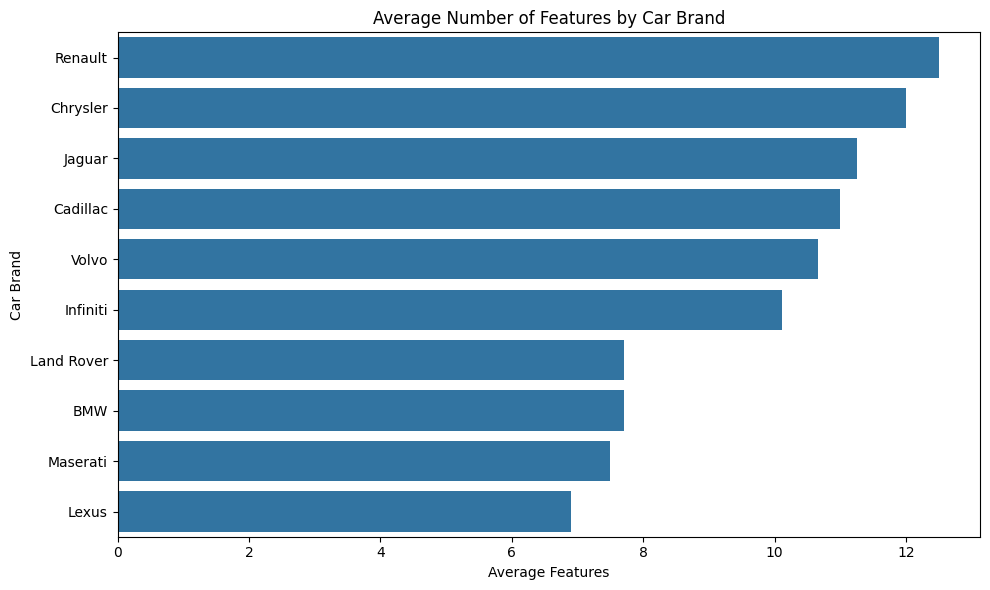

In [100]:
feature_cols = df.columns[df.columns.get_loc("ABS"):df.columns.get_loc("Անձրևի սենսոր")+1]
df['feature_total'] = df[feature_cols].sum(axis=1)

avg_features = df.groupby('car_type')['feature_total'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_features.values, y=avg_features.index)
plt.title("Average Number of Features by Car Brand")
plt.xlabel("Average Features")
plt.ylabel("Car Brand")
plt.tight_layout()
plt.show()



---

### 📉 **1. How quickly do cars lose value?**

* Clear **negative correlation**: newer cars are more expensive.
* Depreciation is visible — cars lose value significantly within the first few years.

---

### 🚘 **2. Do certain brands retain value better?**

* Among recent models (2010+), **Mercedes-Benz** tends to have **higher price retention**.
* **Toyota** shows good consistency.
* **VAZ (Lada)** has the lowest price range, even for newer cars.

---

### 🛠️ **3. Are more equipped cars more expensive?**

* Yes — there's a clear **positive trend**: cars with more features (like ABS, ESP, etc.) tend to be priced higher.
* This confirms that **equipment level adds value**.

---

### ⚙️ **4. Is customization associated with value or wear?**

* **Customed cars** are slightly **more expensive** on average.
* But also have **higher mileage**, suggesting:

  * They may be older or heavily used.
  * Customization may occur later in a car’s life cycle.




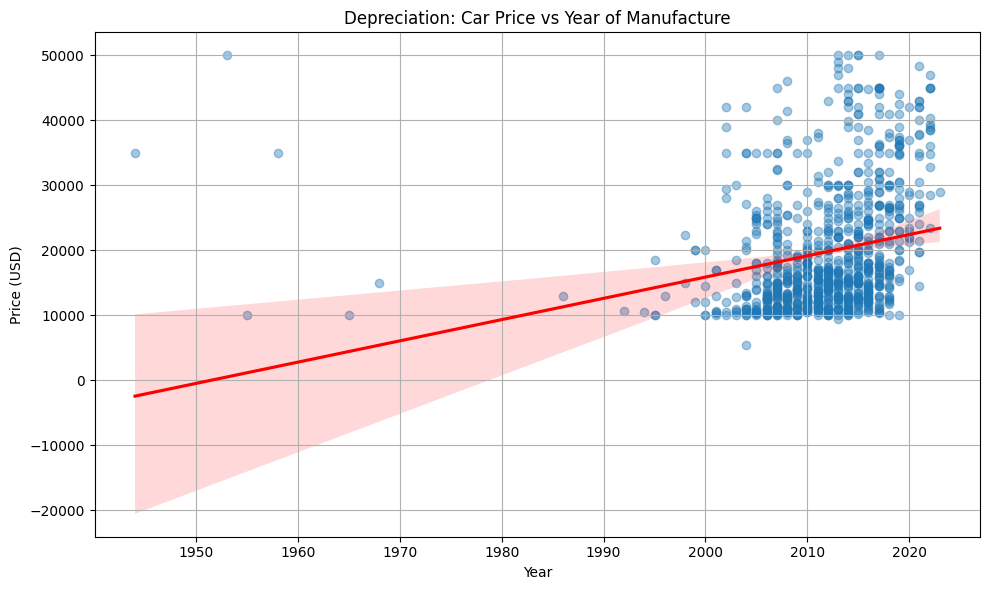

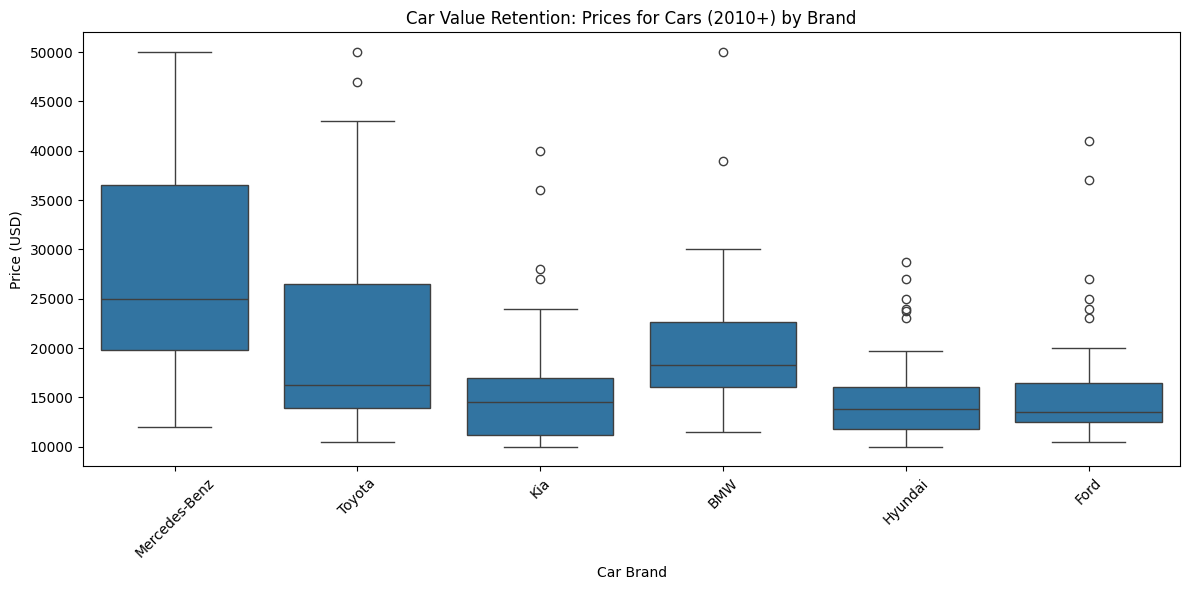

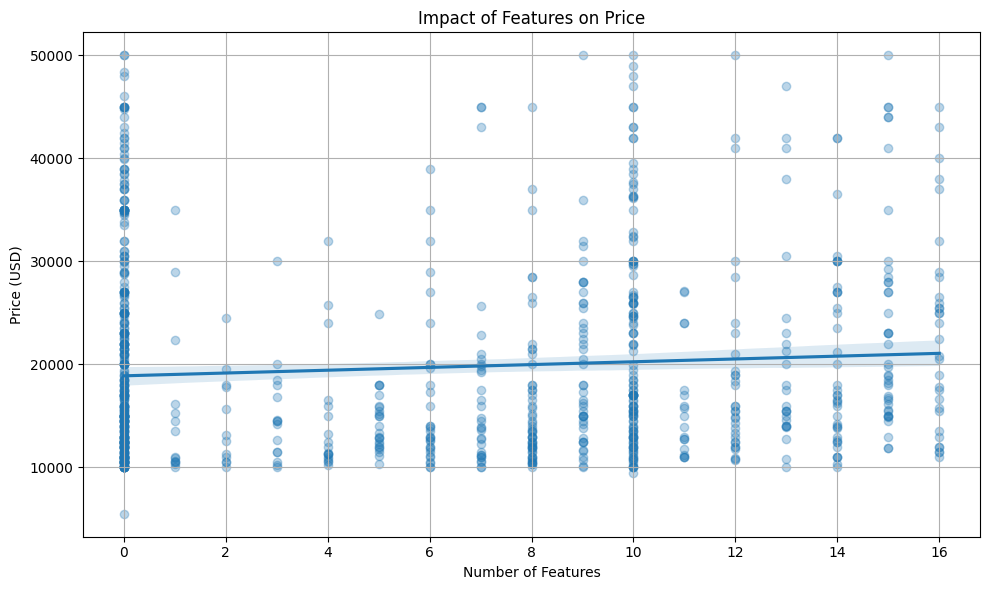

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. How quickly do cars lose value? (Regression line)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='year', y='price.USD', scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title("Depreciation: Car Price vs Year of Manufacture")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Do certain brands retain value better? (Boxplot by brand and year > 2010)
recent_cars = df[df['year'] >= 2010]
top_brands = recent_cars['car_type'].value_counts().head(6).index
recent_top = recent_cars[recent_cars['car_type'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=recent_top, x='car_type', y='price.USD')
plt.title("Car Value Retention: Prices for Cars (2010+) by Brand")
plt.xlabel("Car Brand")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Are more equipped cars more expensive?
# Sum of features already computed earlier as 'feature_total', recompute if missing
feature_cols = df.columns[df.columns.get_loc("ABS"):df.columns.get_loc("Անձրևի սենսոր")+1]
df['feature_total'] = df[feature_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='feature_total', y='price.USD', scatter_kws={'alpha':0.3})
plt.title("Impact of Features on Price")
plt.xlabel("Number of Features")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Car Dataset: Feature Engineering for Modeling
This demonstrates how to apply feature engineering techniques to a car listing dataset.

## Car Age

In [4]:
df['car_age'] = datetime.now().year - df['year']

NameError: name 'datetime' is not defined

## Is Premium Brand

In [104]:
premium_brands = ['BMW', 'Mercedes-Benz', 'Lexus', 'Porsche', 'Land Rover', 'Audi']
df['is_premium'] = df['car_type'].isin(premium_brands).astype(int)

## High Mileage Indicator

In [105]:
df['high_mileage'] = (df['mileage_km'] > 200_000).astype(int)

## Feature Score

In [106]:
feature_cols = df.columns[df.columns.get_loc("ABS"):df.columns.get_loc("Անձրևի սենսոր") + 1]
df['feature_total'] = df[feature_cols].sum(axis=1)

## Price per Year of Age

In [107]:
df['price_per_year'] = df['price.USD'] / (df['car_age'] + 1)

## Location Type (Yerevan Indicator)

In [108]:
df['is_yerevan'] = df['location'].str.contains("Երևան", na=False).astype(int)

## Final Preview

In [111]:
df.head()

,year,car_type,model,title,listed_date,location,customed,price.USD,price.AMD,mileage_km,...,Լույսի սենսոր,Անձրևի սենսոր,first_image,image_preview,car_age,is_premium,high_mileage,feature_total,price_per_year,is_yerevan
0,1953.0,GAZ,12,1953 GAZ 12 - Auto.am,17.01.2023,"Հայաստան, Արարատ",True,50000.0,24000000.0,120000.0,...,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...,"<img src=""/Users/yenokhakobyan/Projects/fastai...",72.0,0,0,0,684.931507,0
1,1944.0,Jeep,Wrangler,1944 Jeep Wrangler - Auto.am,13.04.2022,"Հայաստան, Երևան",True,35000.0,16828700.0,15000.0,...,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...,"<img src=""/Users/yenokhakobyan/Projects/fastai...",81.0,0,0,0,426.829268,1
2,2002.0,Mercedes-Benz,G 500,2002 Mercedes-Benz G 500 - Auto.am,25.01.2023,"Հայաստան, Երևան",True,39000.0,15271230.0,335000.0,...,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...,"<img src=""/Users/yenokhakobyan/Projects/fastai...",23.0,1,1,0,1625.000000,1
3,2016.0,VAZ (Lada),2121 NIVA (4x4),2016 VAZ (Lada) 2121 NIVA (4x4) - Auto.am,18.07.2022,Հայաստան,True,10700.0,5136000.0,42600.0,...,0,0,/Users/yenokhakobyan/Projects/fastai_practice/...,"<img src=""/Users/yenokhakobyan/Projects/fastai...",9.0,0,0,9,1070.000000,0
4,2007.0,Lexus,RX 350,2007 Lexus RX 350 - Auto.am,03.01.2023,"Հայաստան, Երևան",True,15000.0,5952600.0,241401.0,...,1,1,/Users/yenokhakobyan/Projects/fastai_practice/...,"<img src=""/Users/yenokhakobyan/Projects/fastai...",18.0,1,1,10,789.473684,1


# Car Dataset: Data Cleaning 
This notebook demonstrates data cleaning.

## 2. Drop Unnecessary Columns

In [125]:
cols_to_drop = ['title', 'listed_date', 'image_preview']
df.drop(columns=cols_to_drop, inplace=True)

## 3. Fix Data Types

In [126]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['customed'] = df['customed'].astype(bool)

## 4. Handle Missing Values

In [127]:
# Drop rows with critical missing values
df = df.dropna(subset=['price.USD', 'year', 'mileage_km'])

# Fill non-critical missing values
df['engine_volume'].fillna(df['engine_volume'].median(), inplace=True)
df['location'].fillna('Unknown', inplace=True)

/var/folders/4r/6fydpnls2mg8q1p98g9zqmy00000gn/T/ipykernel_73870/1748820892.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine_volume'].fillna(df['engine_volume'].median(), inplace=True)
/var/folders/4r/6fydpnls2mg8q1p98g9zqmy00000gn/T/ipykernel_73870/1748820892.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

## 5. Normalize Text Columns

In [128]:
df['fuel_type'] = df['fuel_type'].str.lower().str.strip()
df['transmission'] = df['transmission'].str.lower().str.strip()

## 6. Remove Outliers

In [129]:
df = df[(df['price.USD'] < 200000) & (df['mileage_km'] < 500000) & (df['year'] > 1950)]

## 7. Final Sanity Check

In [130]:
print('Final shape:', df.shape)
print('\nRemaining missing values:\n', df.isnull().sum())

Final shape: (879, 32)

Remaining missing values:
 year                            0
car_type                        0
model                           0
location                        0
customed                        0
price.USD                       0
price.AMD                       0
mileage_km                      0
transmission                    0
fuel_type                       0
body_type                       0
color                           0
drive_side                      0
engine_volume                   0
feature_count                   0
ABS                             0
ESP                             0
EBD                             0
TRC                             0
Բորտ-համակարգիչ                 0
Տաքացվող նստատեղեր              0
Էլեկտրակառավարվող հայելիներ     0
Կրուիզ-կոնտրոլ                  0
Լյուկ                           0
Կոնդիցիոներ                     0
Կլիմատ-կոնտրոլ                  0
Ետևի տեսադաշտի տեսախցիկ         0
Նավիգացիոն համակարգ            

# 🧠 Quiz: Pandas, EDA, and Statistics (Beginner to Advanced)
Use this notebook to test your knowledge on data analysis using Pandas and statistical concepts.

## 🟢 Beginner Questions

**Q1.** How can you view the first 5 rows of a DataFrame named `df`?
- A) `df.first()`
- B) `df.head()`
- C) `df.view(5)`
- D) `df.preview()`

In [ ]:
# Your answer:
df.head()

**Q2.** How do you check for missing values in the entire DataFrame?
- A) `df.missing()`
- B) `df.isnull().sum()`
- C) `df.isna()`
- D) `df.hasna()`

In [ ]:
# Your answer:
df.isnull().sum()

**Q3.** How would you filter rows where the price is above $10,000?
- A) `df[df.price > 10000]`
- B) `df.where(price > 10000)`
- C) `df.filter(df['price'] > 10000)`

In [ ]:
# Your answer:
df[df['price.USD'] > 10000]

**Q11.** How do you list all column names in a DataFrame?
- A) `df.columns()`
- B) `df.columns`

In [ ]:
# Your answer:
df.columns

**Q12.** What does `df.describe()` provide?
- A) Summary statistics for numerical columns
- B) Only column names
- C) Data types

In [ ]:
# Your answer:
df.describe()

**Q13.** How can you rename a column from `old_name` to `new_name`?
- A) `df.rename(columns={'old_name': 'new_name'})`
- B) `df.columns['old_name'] = 'new_name'`

In [ ]:
# Your answer:
df.rename(columns={'old_name': 'new_name'}, inplace=True)

**Q14.** How would you sort the DataFrame by price in descending order?
- A) `df.sort('price.USD', ascending=False)`
- B) `df.sort_values('price.USD', ascending=False)`

In [ ]:
# Your answer:
df.sort_values('price.USD', ascending=False)

**Q15.** How do you create a new column that is the log of price?
- A) `df['log_price'] = log(df['price'])`
- B) `df['log_price'] = np.log(df['price.USD'])`

In [ ]:
import numpy as np
# Your answer:
df['log_price'] = np.log(df['price.USD'])

**Q16.** How do you count the number of unique values in a column like `fuel_type`?
- A) `df['fuel_type'].unique()`
- B) `df['fuel_type'].nunique()`

In [ ]:
# Your answer:
df.shape

**Q18.** What does `df.dtypes` show?
- A) Number of nulls per column
- B) Data types of each column
- C) Descriptive statistics

In [ ]:
# Your answer:
df.dtypes

**Q19.** How would you select just the `price.USD` and `mileage_km` columns?
- A) `df[['price.USD', 'mileage_km']]`
- B) `df['price.USD', 'mileage_km']`

In [ ]:
# Your answer:
df[['price.USD', 'mileage_km']]

**Q20.** How can you create a new column showing the price per km driven?
- A) `df['ppkm'] = df['price.USD'] / df['mileage_km']`
- B) `df['ppkm'] = divide(df['price.USD'], df['mileage_km'])`

In [ ]:
# Your answer:
df['ppkm'] = df['price.USD'] / df['mileage_km']

**Q21.** How do you filter rows where fuel type is 'gas' or 'petrol'?

In [ ]:
# Your answer:
df[df['fuel_type'].isin(['gas', 'petrol'])]

**Q22.** How do you replace all missing `engine_volume` values with the median?

In [ ]:
# Your answer:
df['engine_volume'].fillna(df['engine_volume'].median(), inplace=True)

**Q23.** How do you get the row with the highest price?

In [ ]:
# Your answer:
df[df['price.USD'] == df['price.USD'].max()]

In [ ]:
# Your answer:
df['fuel_type'].nunique()

**Q4.** How can you group the dataset by `car_type` and find the average price?
- A) `df.groupby('car_type')['price.USD'].mean()`
- B) `df.groupby('price.USD')['car_type'].mean()`
- C) `df['car_type'].mean('price.USD')`

In [ ]:
# Your answer:
df.groupby('car_type')['price.USD'].mean()

**Q5.** What function would you use to create a histogram of mileage?
- A) `sns.histplot(df['mileage_km'])`
- B) `df.hist('mileage_km')`
- C) Both A and B

In [ ]:
# Your answer:
import seaborn as sns
sns.histplot(df['mileage_km'])

**Q6.** How can you find the correlation between numerical columns?
- A) `df.correlate()`
- B) `df.corr()`
- C) `df.describe()`

In [ ]:
# Your answer:
df.corr(numeric_only=True)

**Q7.** What does a negative correlation between `car_age` and `price.USD` suggest?

In [ ]:
# Your answer:
# As car age increases, the price decreases (older cars are cheaper).

**Q8.** How would you check for multicollinearity between numerical features?

In [ ]:
# Your answer:
# Use correlation matrix or VIF (Variance Inflation Factor) analysis.

**Q9.** What statistical test would you use to compare the mean price between two brands?

In [ ]:
# Your answer:
# Use a t-test (independent samples t-test).

**Q10.** What is the purpose of feature scaling before training a model?
- A) To increase model accuracy
- B) To normalize feature impact
- C) To convert all features to integers

In [ ]:
# Your answer:
# B) To normalize feature impact

# 🖼️ Image Feature Engineering & Similarity in Computer Vision
This notebook demonstrates how to extract common image features and compute similarity scores using Euclidean distance.

## 🧠 10 Common Image Features

## 📐 Image Feature Descriptions

This section explains the meaning and motivation behind each of the image features used in this notebook. These features help quantify visual properties that can later be used for similarity comparison, clustering, or even model input.

---

### 🔢 `feature_1`: Mean Pixel Intensity
- **Definition:** Average brightness of the image.
- **Purpose:** Gives a rough measure of overall illumination; low values may indicate dark images.

---

### 📊 `feature_2`: Standard Deviation of Pixel Intensity
- **Definition:** Measures variation in pixel values.
- **Purpose:** Indicates contrast; high variance means strong changes between dark and light areas.

---

### 🟪 `feature_3–10`: Histogram of Pixel Intensities (8 bins)
- **Definition:** Distribution of pixel intensities in 8 equal-size bins between 0 and 255.
- **Purpose:** Captures the tonal profile of the image (e.g., is it mostly dark or bright?).

---

### 🔺 `feature_11`: Maximum Pixel Value
- **Definition:** Brightest pixel in the grayscale image.
- **Purpose:** Helps identify overexposed or very bright regions.

---

### 🔻 `feature_12`: Minimum Pixel Value
- **Definition:** Darkest pixel in the grayscale image.
- **Purpose:** Useful to detect shadows or underexposed regions.

---

### 🔸 `feature_13`: 25th Percentile of Pixel Intensities
- **Definition:** Pixel value below which 25% of pixels fall.
- **Purpose:** Describes the "shadow" range; part of contrast analysis.

---

### 🔸 `feature_14`: 75th Percentile of Pixel Intensities
- **Definition:** Pixel value below which 75% of pixels fall.
- **Purpose:** Describes the "highlight" range; complements the 25th percentile.

---

### 🧪 `feature_15`: Laplacian Variance
- **Definition:** Variance of the Laplacian of the image.
- **Purpose:** Measures sharpness or edge detail. High values = focused image; low = blurry.

---

### 💡 `feature_16`: Bright Pixel Count
- **Definition:** Number of pixels with intensity > 200.
- **Purpose:** Indicates how many regions in the image are visually bright.

---

### 🧬 `feature_17`: HOG (Histogram of Oriented Gradients) Summary
- **Definition:** A simplified version of the HOG descriptor capturing edge orientation.
- **Purpose:** Detects object shapes and contours — useful for vehicle outlines or form factors.

---

These features form a compact but descriptive fingerprint of each image and can be compared using distance metrics such as **Euclidean Distance** to assess visual similarity.


# 🧪 Visualizing Image Feature Engineering
This notebook explains and visualizes each of the extracted features from an image.

## 🖼️ Image Loading and Grayscale Conversion

In this step, we use **OpenCV (`cv2`)** and **NumPy** to load and process an image of a car from disk. This is a foundational step for any kind of computer vision task (e.g., object detection, classification, feature extraction).

### 🔧 Steps Performed:

1. **Image Loading**:
   - The image is loaded using `cv2.imread()`, which reads the image in BGR (Blue-Green-Red) format by default.

2. **Color Space Conversion**:
   - We convert the BGR image to RGB using `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` to ensure correct color representation when visualizing with `matplotlib`.

3. **Grayscale Conversion**:
   - The image is also converted to grayscale using `cv2.COLOR_BGR2GRAY`, which reduces it to a single channel based on brightness.

4. **Display**:
   - The grayscale image is visualized using `matplotlib.pyplot.imshow()` with axis turned off for a cleaner view.

### 📌 Use Cases:
- Grayscale images are often used in image processing tasks such as edge detection, thresholding, or feeding into machine learning models when color information is not essential.


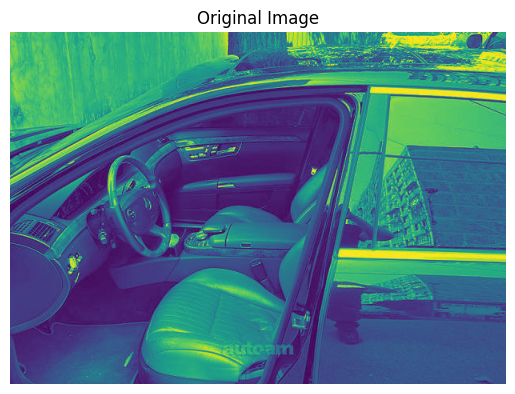

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image to grayscale
img = cv2.imread('/Users/yenokhakobyan/Projects/fastai_practice/data collector/images/2778553/m-3c3ff91a7d36efa05152ea4814c6de16.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Original Image')
plt.axis('off')
plt.show()

## 🔢 Feature 1: Mean Pixel Intensity

In [135]:
print('Mean pixel value:', np.mean(gray))

Mean pixel value: 96.45899926686216


## 📊 Feature 2: Standard Deviation of Intensity

In [136]:
print('Standard deviation of pixel values:', np.std(gray))

Standard deviation of pixel values: 62.23725986433544


## 🟪 Feature 3–10: Histogram of Pixel Intensities (8 bins)

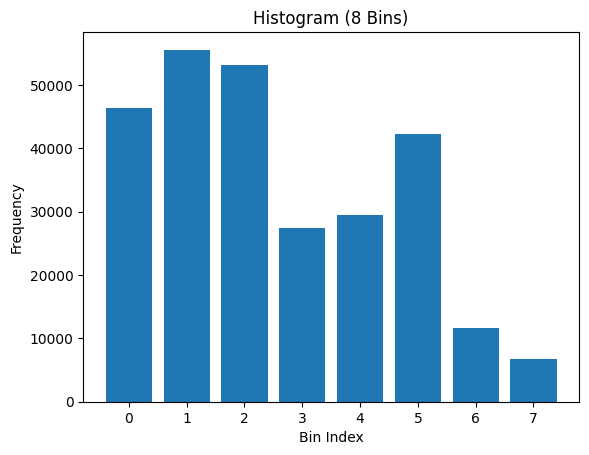

In [137]:
hist = cv2.calcHist([gray], [0], None, [8], [0, 256]).flatten()
plt.bar(range(8), hist)
plt.title('Histogram (8 Bins)')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.show()

## 🔺 Feature 11: Maximum Pixel Value

In [138]:
print('Maximum pixel value:', np.max(gray))

Maximum pixel value: 255


## 🔻 Feature 12: Minimum Pixel Value

In [139]:
print('Minimum pixel value:', np.min(gray))

Minimum pixel value: 0


## 🔸 Feature 13–14: Pixel Intensity Percentiles

In [140]:
print('25th percentile:', np.percentile(gray, 25))
print('75th percentile:', np.percentile(gray, 75))

25th percentile: 44.0
75th percentile: 153.0


## 🧪 Feature 15: Laplacian Variance (Sharpness)

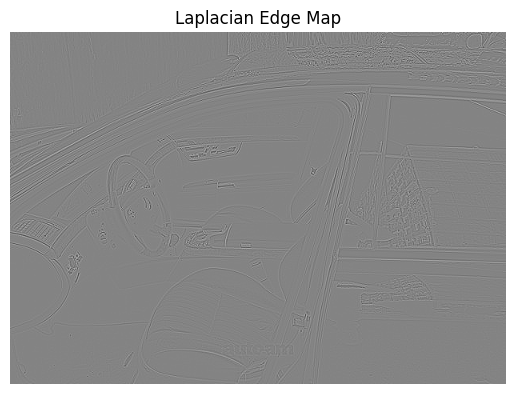

Laplacian Variance: 2912.7457646745684


In [141]:
lap = cv2.Laplacian(gray, cv2.CV_64F)
plt.imshow(lap, cmap='gray')
plt.title('Laplacian Edge Map')
plt.axis('off')
plt.show()

print('Laplacian Variance:', lap.var())

## 💡 Feature 16: Count of Bright Pixels (> 200)

In [142]:
bright_pixels = np.count_nonzero(gray > 200)
print('Bright pixel count (>200):', bright_pixels)

Bright pixel count (>200): 11639


## 🧬 Feature 17: HOG Feature Sample

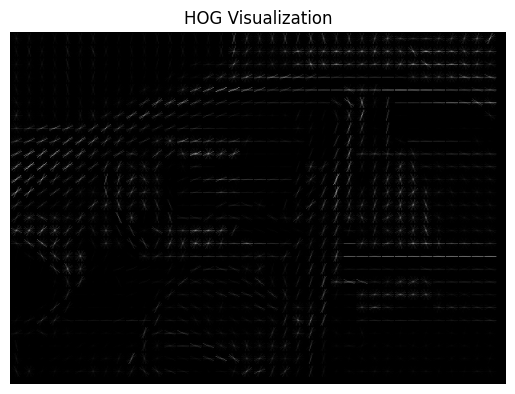

First HOG feature value: 0.3382077025336833


In [143]:
from skimage.feature import hog
hog_feature, hog_image = hog(gray, pixels_per_cell=(16, 16),
                                 cells_per_block=(1, 1), visualize=True)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')
plt.show()

print('First HOG feature value:', hog_feature[0])

Adding All the features to the main Dataframe

In [131]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog

df  = pd.read_csv("car_data.csv")

# Helper: Load and preprocess image
def load_image(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img is not None else None

def resize_gray(img, size=(128, 128)):
    return cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), size)

# Feature extractor: 10 common features
def extract_features(img):
    gray = resize_gray(img)
    features = []

    features.append(np.mean(gray))                                     # 1. Mean
    features.append(np.std(gray))                                      # 2. Std Dev
    features.extend(cv2.calcHist([gray], [0], None, [8], [0, 256]).flatten())  # 3. Histogram (8 bins)
    features.append(np.max(gray))                                      # 4. Max pixel
    features.append(np.min(gray))                                      # 5. Min pixel
    features.append(np.percentile(gray, 25))                           # 6. 25th percentile
    features.append(np.percentile(gray, 75))                           # 7. 75th percentile
    features.append(cv2.Laplacian(gray, cv2.CV_64F).var())             # 8. Laplacian variance (edges)
    features.append(np.count_nonzero(gray > 200))                     # 9. Bright pixel count
    features.extend(hog(gray, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), feature_vector=True)[:1])  # 10. HOG (only 1 feature for simplicity)
    return np.array(features)

# Apply feature extraction for each row
features_list = []
valid_indices = []

for idx, row in df.iterrows():
    path = row['first_image']
    try:
        img = load_image(path)
        if img is not None:
            feats = extract_features(img)
            features_list.append(feats)
            valid_indices.append(idx)
    except Exception as e:
        print(f"Failed for {path}: {e}")

# Create DataFrame with features
features_array = np.vstack(features_list)
feature_cols = [f'feature_{i+1}' for i in range(features_array.shape[1])]
features_df = pd.DataFrame(features_array, index=valid_indices, columns=feature_cols)

# Merge back into original DataFrame
df_features = df.join(features_df, how='left')

# Preview
df_features.head()


Failed for nan: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object

Failed for nan: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object

Failed for nan: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object

Failed for nan: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str

,year,car_type,model,title,listed_date,location,customed,price.USD,price.AMD,mileage_km,...,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,1953.0,GAZ,12,1953 GAZ 12 - Auto.am,17.01.2023,"Հայաստան, Արարատ",True,50000.0,24000000.0,120000.0,...,3667.0,1053.0,247.0,254.0,0.0,68.0,170.0,12560.773990,567.0,0.346867
1,1944.0,Jeep,Wrangler,1944 Jeep Wrangler - Auto.am,13.04.2022,"Հայաստան, Երևան",True,35000.0,16828700.0,15000.0,...,539.0,421.0,9860.0,255.0,2.0,125.0,234.0,5565.012272,10148.0,0.000000
2,2002.0,Mercedes-Benz,G 500,2002 Mercedes-Benz G 500 - Auto.am,25.01.2023,"Հայաստան, Երևան",True,39000.0,15271230.0,335000.0,...,1135.0,987.0,5022.0,255.0,3.0,86.0,234.0,7834.311792,5752.0,0.000000
3,2016.0,VAZ (Lada),2121 NIVA (4x4),2016 VAZ (Lada) 2121 NIVA (4x4) - Auto.am,18.07.2022,Հայաստան,True,10700.0,5136000.0,42600.0,...,2435.0,905.0,259.0,254.0,1.0,59.0,155.0,2972.157219,821.0,0.363557
4,2007.0,Lexus,RX 350,2007 Lexus RX 350 - Auto.am,03.01.2023,"Հայաստան, Երևան",True,15000.0,5952600.0,241401.0,...,1502.0,393.0,250.0,255.0,1.0,39.0,140.0,7801.901418,488.0,0.343714


## 📐 Compute Pairwise Euclidean Distances Between Feature Vectors

In this step, we calculate the **Euclidean distance** between all items in the dataset based on their extracted features (e.g., vehicle options). This allows us to measure similarity or dissimilarity between vehicle listings.

---

### 🧮 Steps Explained:

1. **Select Feature Columns**:
   - Automatically selects columns named `feature_1` to `feature_17` (or similar) using string prefix matching.
   - These are assumed to be binary or numerical indicators of vehicle characteristics.

2. **Construct Feature Matrix**:
   - Drops rows with missing values in any feature column.
   - Converts the feature subset to a NumPy array for distance calculation.

3. **Calculate Pairwise Distances**:
   - Uses `sklearn.metrics.pairwise.euclidean_distances()` to compute Euclidean distance between every pair of listings.
   - Produces a symmetric matrix of shape *(n x n)*.

4. **Wrap in a DataFrame**:
   - Converts the distance matrix into a `pandas.DataFrame` for easier readability and further analysis.

5. **Label with Titles**:
   - Replaces default numeric indices with the corresponding vehicle `title` values to improve interpretability.

---

### 📌 Use Cases:
- **Similarity Search**: Find listings similar to a given car based on features.
- **Clustering**: Group similar cars for unsupervised learning.
- **Recommendation Systems**: Suggest similar vehicles based on a user's selection.

This setup builds the foundation for similarity-based retrieval or recommendation in automotive datasets.


In [147]:
from sklearn.metrics.pairwise import euclidean_distances

# Extract only feature columns (assumes they are named feature_1 to feature_17)
feature_columns = [col for col in df.columns if col.startswith("feature_")]
feature_matrix = df[feature_columns].dropna().values

# Calculate Euclidean distance matrix
distance_matrix = euclidean_distances(feature_matrix)

# Wrap in a DataFrame for easier inspection
distance_df = pd.DataFrame(distance_matrix, index=df.dropna(subset=feature_columns).index,
                           columns=df.dropna(subset=feature_columns).index)

# Use 'title' values instead of numeric indices in the distance matrix
valid_titles = df.loc[df.dropna(subset=feature_columns).index, 'title']

# Reassign titles as index and column names for the distance matrix
distance_df.index = valid_titles
distance_df.columns = valid_titles

In [148]:
distance_df

title,1953 GAZ 12 - Auto.am,1944 Jeep Wrangler - Auto.am,2002 Mercedes-Benz G 500 - Auto.am,2016 VAZ (Lada) 2121 NIVA (4x4) - Auto.am,2007 Lexus RX 350 - Auto.am,2004 Mercedes-Benz CLS 500 - Auto.am,2014 Mercedes-Benz GLA 200 - Auto.am,2012 Mercedes-Benz CLS 55 AMG - Auto.am,2004 Mercedes-Benz Viano - Auto.am,2015 Toyota Corolla - Auto.am,...,2011 Mercedes-Benz E 350 - Auto.am,2010 BMW 750 - Auto.am,2007 Honda CR-V - Auto.am,2018 Hyundai Elantra - Auto.am,2003 Mercedes-Benz E 320 - Auto.am,2018 Mitsubishi Eclipse Cross - Auto.am,2010 Toyota Camry - Auto.am,2006 Toyota Land Cruiser Prado - Auto.am,2016 Hyundai Elantra - Auto.am,2004 Lexus GX 470 - Auto.am
title,,,,,,,,,,,,,,,,,,,,,
1953 GAZ 12 - Auto.am,0.0,0.0,5.0,24.0,11.0,1.0,18.0,39.0,6.0,24.0,...,40.0,5.0,1.0,11.0,12.0,9.0,2.0,1.0,6.0,27.0
1944 Jeep Wrangler - Auto.am,0.0,0.0,5.0,24.0,11.0,1.0,18.0,39.0,6.0,24.0,...,40.0,5.0,1.0,11.0,12.0,9.0,2.0,1.0,6.0,27.0
2002 Mercedes-Benz G 500 - Auto.am,5.0,5.0,0.0,19.0,6.0,4.0,13.0,34.0,1.0,19.0,...,35.0,0.0,4.0,6.0,7.0,4.0,3.0,4.0,1.0,22.0
2016 VAZ (Lada) 2121 NIVA (4x4) - Auto.am,24.0,24.0,19.0,0.0,13.0,23.0,6.0,15.0,18.0,0.0,...,16.0,19.0,23.0,13.0,12.0,15.0,22.0,23.0,18.0,3.0
2007 Lexus RX 350 - Auto.am,11.0,11.0,6.0,13.0,0.0,10.0,7.0,28.0,5.0,13.0,...,29.0,6.0,10.0,0.0,1.0,2.0,9.0,10.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018 Mitsubishi Eclipse Cross - Auto.am,9.0,9.0,4.0,15.0,2.0,8.0,9.0,30.0,3.0,15.0,...,31.0,4.0,8.0,2.0,3.0,0.0,7.0,8.0,3.0,18.0
2010 Toyota Camry - Auto.am,2.0,2.0,3.0,22.0,9.0,1.0,16.0,37.0,4.0,22.0,...,38.0,3.0,1.0,9.0,10.0,7.0,0.0,1.0,4.0,25.0
2006 Toyota Land Cruiser Prado - Auto.am,1.0,1.0,4.0,23.0,10.0,0.0,17.0,38.0,5.0,23.0,...,39.0,4.0,0.0,10.0,11.0,8.0,1.0,0.0,5.0,26.0


In [151]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         923 non-null    float64
 1   car_type                     923 non-null    object 
 2   model                        923 non-null    object 
 3   title                        923 non-null    object 
 4   listed_date                  923 non-null    object 
 5   location                     908 non-null    object 
 6   customed                     923 non-null    object 
 7   price.USD                    923 non-null    float64
 8   price.AMD                    923 non-null    float64
 9   mileage_km                   881 non-null    float64
 10  transmission                 941 non-null    object 
 11  fuel_type                    941 non-null    object 
 12  body_type                    941 non-null    object 
 13  color               

## 🤖 Price Prediction Using K-Nearest Neighbors (KNN)

In this section, we build and evaluate a machine learning pipeline to predict vehicle prices in USD using structured features. The pipeline includes data preprocessing, feature transformation, and model training using a **K-Nearest Neighbors Regressor**.

---

### 🧹 Step 1: Drop Unnecessary Columns
Columns that are non-informative for modeling (e.g., titles, images, AMD price, and dates) are removed.

### 🧼 Step 2: Remove Rows with Missing Target
Rows where the target variable `price.USD` is missing are excluded from the dataset.

### 📦 Step 3: Feature/Target Separation
- `X`: Feature matrix
- `y`: Target vector (`price.USD`)

---

### 🧾 Step 4: Identify Column Types
- **Numerical Features**: All columns with numeric types (`int64`, `float64`)
- **Categorical Features**: All columns with `object` (string) data types

---

### 🔧 Step 5: Define Preprocessing Pipelines
We build two separate preprocessing pipelines:

- **Numerical Pipeline**:
  - Impute missing values with the **median**
  - Standardize features using **z-score normalization**

- **Categorical Pipeline**:
  - Impute missing values with the **most frequent** category
  - Encode categorical features using **OneHotEncoder**

All transformations are combined using `ColumnTransformer`.

---

### 🛠️ Step 6: Define Modeling Pipeline
We build a full pipeline that includes:
- Preprocessing (as defined above)
- K-Nearest Neighbors Regressor (`n_neighbors=5`)

This ensures all transformations are consistently applied during training and inference.

---

### 🔀 Step 7: Train/Test Split
Data is split into training and test sets using an 80/20 ratio with a fixed random seed (`random_state=42`) for reproducibility.

---

### 📊 Step 8: Train and Evaluate the Model
- The pipeline is fitted to the training data.
- Predictions are made on the test set.
- We evaluate the model using:
  - **Mean Squared Error (MSE)**: Measures average squared prediction error.
  - **R² Score**: Measures proportion of variance explained by the model.

---

### 📈 Model Evaluation Results
The output of the final cell is:
- `mse`: *Mean Squared Error* of predictions
- `r2`: *Coefficient of Determination* (higher is better; 1.0 is perfect)

These metrics help assess how well the KNN model performs on unseen data.



In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Drop unhelpful columns
columns_to_drop = [
    'title', 'listed_date', 'price.AMD', 'model', 'first_image', 'image_preview'
]
df_model = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Step 2: Drop rows with missing target (price)
df_model = df_model.dropna(subset=['price.USD'])

# Step 3: Separate features and target
X = df_model.drop(columns=['price.USD'])
y = df_model['price.USD']

# Step 4: Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Step 5: Define preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Step 6: Define model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train and evaluate
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(71657597.87675676, 0.3171566994810433)

## 🚘 Classifying Car Type Using K-Nearest Neighbors (KNN)

In this section, we build a classification model to predict the **car brand/type** from structured vehicle features. To keep the task manageable and balanced, we focus on the **Top 3 Most Frequent Car Types** in the dataset.

---

### 🔍 Objective
Classify cars into one of the top 3 car types using a K-Nearest Neighbors (KNN) classifier based on their features (e.g., transmission, fuel type, mileage, etc.).

---

### 📊 Step-by-Step Breakdown

#### 1️⃣ Filter to Top 3 Car Types
We select only the top 3 most common values in the `car_type` column and filter the dataset accordingly.

#### 2️⃣ Drop Irrelevant Columns
We remove non-informative or data-leaking columns, such as:
- `title`, `listed_date`, `model`, and image fields
- Price fields (`price.USD`, `price.AMD`) — since we're predicting car type, not price

#### 3️⃣ Define Features and Target
- `X_top5`: Feature set
- `y_top5`: Target labels (`car_type`)

#### 4️⃣ Identify Feature Types
- **Numerical Features**: Detected automatically using data type inspection.
- **Categorical Features**: Includes string-based columns for car options, body type, etc.

---

### 🧹 Step 5: Preprocessing Pipelines
We define preprocessing steps separately for:
- **Numerical Features**:
  - Impute missing values using the **median**
  - Scale values using **StandardScaler**
- **Categorical Features**:
  - Impute missing values using the **most frequent** category
  - Encode using **OneHotEncoder**

These are combined using a `ColumnTransformer`.

---

### 🤖 Step 6: Build KNN Classification Pipeline
We create a pipeline that includes both preprocessing and modeling:
- Preprocessing (as defined above)
- **KNeighborsClassifier** with `n_neighbors=5`

This modular approach ensures consistency and prevents data leakage during training.

---

### 🔀 Step 7: Train-Test Split and Model Training
- The dataset is split into training and test sets using an 80/20 ratio.
- The pipeline is trained on the training data and used to predict car types on the test set.

---

### 📈 Step 8: Model Evaluation
We evaluate the classification model using:
- **Accuracy Score**: Overall correctness of predictions.
- **Classification Report**: Includes precision, recall, and F1-score for each class.

These metrics provide insight into how well the model distinguishes between the top 3 car types.

---

### 📌 Output Variables:
- `accuracy_top5`: Overall prediction accuracy.
- `report_top5`: Detailed performance breakdown per car type.

This model can serve as a prototype for more advanced classification approaches, including multiclass models or neural networks.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Filter to Top 5 Most Frequent Car Types
top_5_brands = df['car_type'].value_counts().head(3).index
df_top5 = df[df['car_type'].isin(top_5_brands)].copy()

# Step 2: Drop irrelevant columns
columns_to_drop_top5 = [
    'title', 'listed_date', 'price.USD', 'price.AMD', 'model', 'first_image', 'image_preview'
]
df_top5.drop(columns=[col for col in columns_to_drop_top5 if col in df_top5.columns], inplace=True)

# Step 3: Separate features and target
X_top5 = df_top5.drop(columns=['car_type'])
y_top5 = df_top5['car_type']

# Step 4: Define columns
numeric_features_top5 = X_top5.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_top5 = X_top5.select_dtypes(include=['object']).columns.tolist()

# Step 5: Preprocessing pipelines
numeric_transformer_top5 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer_top5 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_top5 = ColumnTransformer(transformers=[
    ('num', numeric_transformer_top5, numeric_features_top5),
    ('cat', categorical_transformer_top5, categorical_features_top5)
])

# Step 6: KNN classifier pipeline
classifier_top5_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_top5),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Step 7: Train-test split and model training
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_top5, y_top5, test_size=0.2, random_state=42)

classifier_top5_pipeline.fit(X_train_top5, y_train_top5)
y_pred_top5 = classifier_top5_pipeline.predict(X_test_top5)

# Step 8: Evaluation
accuracy_top5 = accuracy_score(y_test_top5, y_pred_top5)
report_top5 = classification_report(y_test_top5, y_pred_top5)



'               precision    recall  f1-score   support\n\n          BMW       0.41      0.37      0.39        19\nMercedes-Benz       0.50      0.72      0.59        32\n       Toyota       0.56      0.33      0.42        30\n\n     accuracy                           0.49        81\n    macro avg       0.49      0.47      0.47        81\n weighted avg       0.50      0.49      0.48        81\n'

In [ ]:
print(report_top5)

               precision    recall  f1-score   support

          BMW       0.41      0.37      0.39        19
Mercedes-Benz       0.50      0.72      0.59        32
       Toyota       0.56      0.33      0.42        30

     accuracy                           0.49        81
    macro avg       0.49      0.47      0.47        81
 weighted avg       0.50      0.49      0.48        81



## 🧪 Hyperparameter Tuning for KNN Classifier with GridSearchCV

In this section, we optimize our K-Nearest Neighbors classifier using **GridSearchCV**, a brute-force approach to finding the best hyperparameters. We evaluate model performance using accuracy and visualize classification results via a confusion matrix.

---

### 🔍 Objective
Tune hyperparameters of the `KNeighborsClassifier` within a pipeline to maximize classification accuracy for predicting car types (limited to the top 3 most frequent).

---

### ⚙️ Step-by-Step Breakdown

#### 1️⃣ Define Hyperparameter Grid
We define a search space for two key parameters:
- `n_neighbors`: Number of neighbors to consider (odd numbers from 3 to 11)
- `weights`: Distance weighting strategy (`uniform` vs. `distance`)

```python
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance']
}


Best Accuracy: 0.5555555555555556
Best Hyperparameters: {'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

          BMW       0.50      0.26      0.34        19
Mercedes-Benz       0.52      0.69      0.59        32
       Toyota       0.62      0.60      0.61        30

     accuracy                           0.56        81
    macro avg       0.55      0.52      0.52        81
 weighted avg       0.55      0.56      0.54        81



<Figure size 800x600 with 0 Axes>

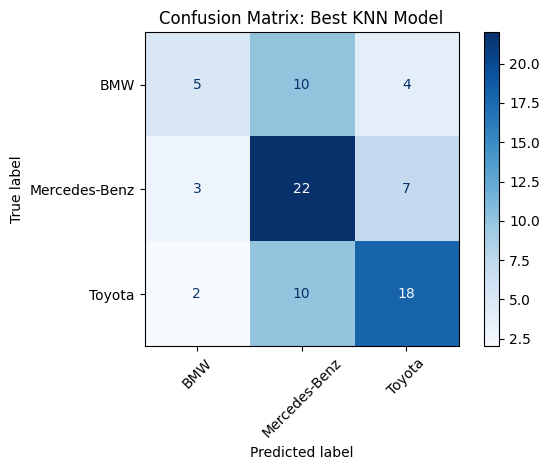

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Define hyperparameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance']
}

# Step 2: Setup GridSearchCV with pipeline
grid_search = GridSearchCV(classifier_top5_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Step 3: Fit the grid search
grid_search.fit(X_train_top5, y_train_top5)

# Step 4: Evaluate best model
best_knn_model = grid_search.best_estimator_
y_pred_best = best_knn_model.predict(X_test_top5)

print("Best Accuracy:", accuracy_score(y_test_top5, y_pred_best))
print("Best Hyperparameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test_top5, y_pred_best))

# Step 5: Confusion matrix visualization
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test_top5, y_test_top5, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix: Best KNN Model")
plt.tight_layout()
plt.show()
